<a href="https://colab.research.google.com/github/raa18-git/ruchi/blob/main/ml_x4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

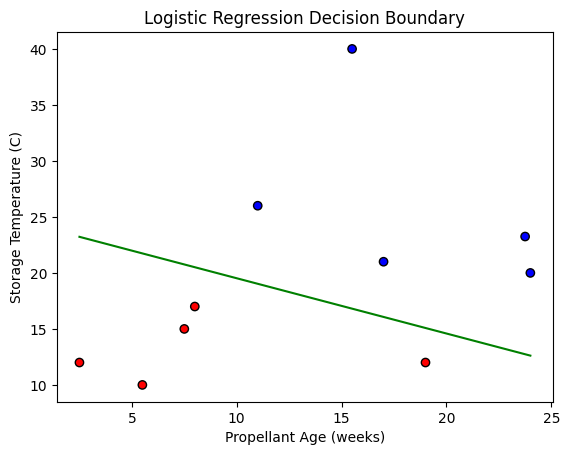

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient of the cost function
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient

# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    cost_history = []
    for i in range(num_iters):
        gradient = compute_gradient(X, y, theta)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Data (Propellant Age, Temperature, and Pass/Fail labels)
X_data = np.array([[15.5, 40],
                   [23.75, 23.25],
                   [8, 17],
                   [17, 21],
                   [5.5, 10],
                   [19, 12],
                   [24, 20],
                   [2.5, 12],
                   [7.5, 15],
                   [11, 26]])

y_data = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

# Add intercept term to X_data (X_0 = 1)
X_data = np.hstack([np.ones((X_data.shape[0], 1)), X_data])

# Initialize parameters
theta_init = np.zeros(X_data.shape[1])
alpha = 0.01
num_iters = 10000

# Perform gradient descent
theta_final, cost_history = gradient_descent(X_data, y_data, theta_init, alpha, num_iters)

# Plotting the scatter of data and decision boundary
def plot_decision_boundary(X, y, theta):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k')

    x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]

    plt.plot(x_values, y_values, 'g')
    plt.xlabel('Propellant Age (weeks)')
    plt.ylabel('Storage Temperature (C)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X_data, y_data, theta_final)
